# Calibration of the flooding model : analysing the fit before calibration

The goal of this example is to analyze the calibration of the simulator associated with the flooding model before calibration.

In [1]:
import openturns as ot
import numpy as np

## Read the observations

We begin by reading the observations from the data file. There are 100 observations of the couple (Q,H).

In [2]:
observedSample = ot.Sample_ImportFromCSVFile("calibration-flooding-observations.csv")
nbobs = observedSample.getSize()
Qobs = observedSample[:,0]
Hobs = observedSample[:,1]
nbobs

100

In [3]:
Hobs.setDescription(["Height (m)"])

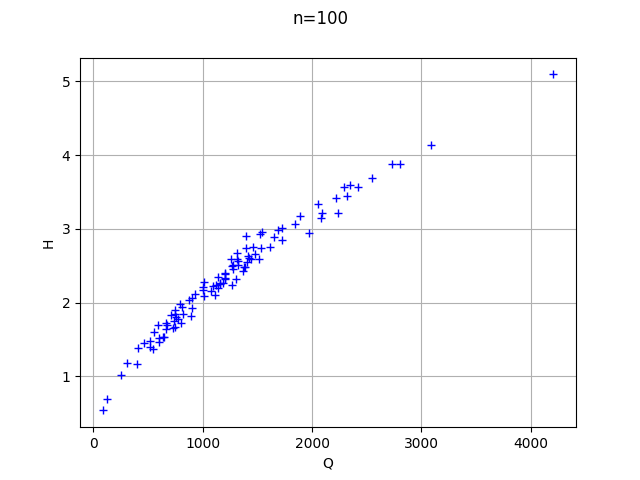

In [4]:
graph = ot.Graph("n=%d" % (nbobs),"Q","H",True)
cloud = ot.Cloud(Qobs,Hobs)
graph.add(cloud)
graph

## Define the model

We define the model which has 4 inputs and one output H.

In [5]:
def functionFloodingModel(X):
    Q, K_s, Z_v, Z_m = X
    L = 5.0e3
    B = 300.0
    alpha = (Z_m - Z_v)/L
    H = (Q/(K_s*B*np.sqrt(alpha)))**(3.0/5.0)
    return [H]

In [6]:
modelPyFunc = ot.PythonFunction(4, 1, functionFloodingModel)
modelPyFunc.setDescription(["Q", "Ks", "Zv", "Zm","H"])

Define the value of the reference values of the $\theta$ parameter. In the bayesian framework, this is called the mean of the *prior* gaussian distribution. In the data assimilation framework, this is called the *background*.

In [7]:
KsInitial = 20.
ZvInitial = 49.
ZmInitial = 51.
thetaBackground = ot.Point([KsInitial,ZvInitial,ZmInitial])

The following statement create the calibrated function from the model. The calibrated parameters Ks, Zv, Zm are at indices 1, 2, 3 in the inputs arguments of the model.

In [8]:
calibratedIndices = [1,2,3]
mycf = ot.ParametricFunction(modelPyFunc, calibratedIndices, thetaBackground)

Check that the output can be computed from the input.

In [9]:
mycf(Qobs)[0:5]

class=Sample name=Unnamed implementation=class=SampleImplementation name=Unnamed size=5 dimension=1 description=[H] data=[[3.58481],[4.76653],[4.477],[5.56172],[3.95938]]

In [10]:
import CalibrationGraphics as cg

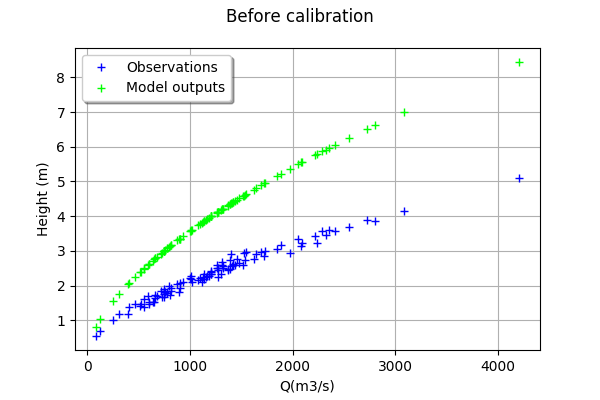

In [11]:
graph = cg.plotModelVsObservations(thetaBackground,Qobs,Hobs,mycf)
graph.setTitle("Before calibration")
graph.setLegendPosition("topleft")
graph

We can see that the observations are far from the outputs of the model. This is because the value of $\theta$ is not close enough from the optimum: the model has to be calibrated.

The limitation of the previous graphics is that the input must be 1D, so that we can plot it on the X axis. 

Another way of analysing the fit is to plot the output predictions (i.e. the output of the model) versus the output observations. 

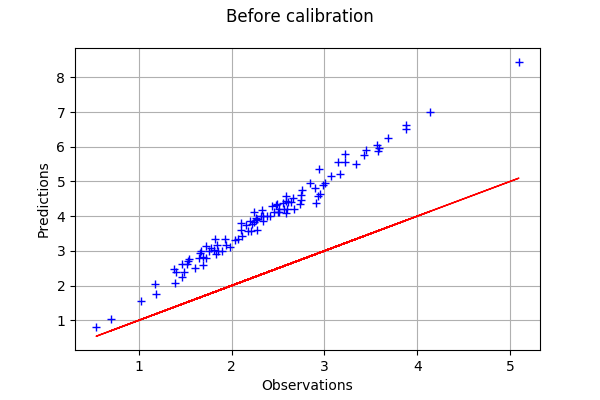

In [12]:
graph = cg.plotObservationsVsPredictions(thetaBackground,Qobs,Hobs,mycf)
graph.setTitle("Before calibration")
graph.setLegendPosition("topleft")
graph

If the fit were good, the blue points were on the red diagonal of the graphics. Here, the fit is not acceptable since the points are far away from the diagonal: in general, the prediction from the model is much larger than the observation.